In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Задание №1

In [ ]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False
    
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask      
    return mask*255

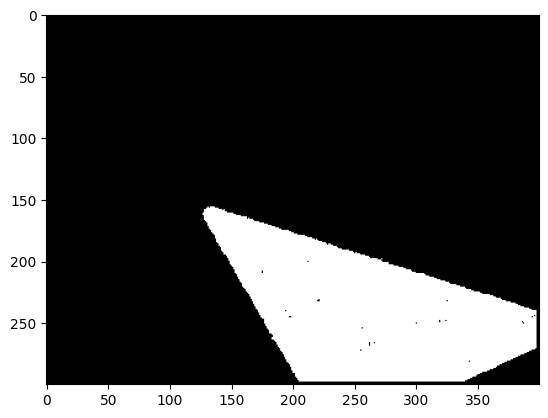

In [29]:
seed_point = (160,130)
mask_avg = region_growing(image_gray,seed_point,homo_average, 2, 30)

plt.imshow(mask_avg, cmap="gray")

# Задание №2

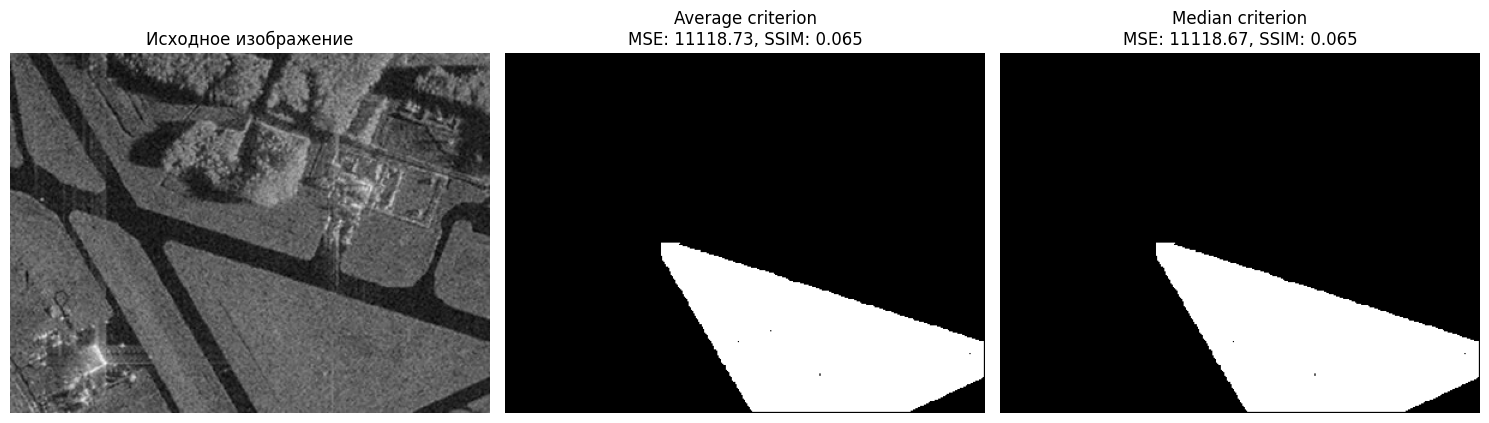

In [ ]:
def homo_median(img, mask, point, T):
    region = img[mask > 0]
    if len(region) == 0:
        return False
    median_val = np.median(region)
    if abs(median_val - img[point]) <= T:
        return True
    return False

mask_med = region_growing(image_gray, seed_point, homo_median, 2, 30)

mse_avg = mean_squared_error(image_gray, mask_avg)
mse_med = mean_squared_error(image_gray, mask_med)

ssim_avg = structural_similarity(image_gray, mask_avg)
ssim_med = structural_similarity(image_gray, mask_med)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_avg, cmap='gray')
plt.title(f'Average criterion\nMSE: {mse_avg:.2f}, SSIM: {ssim_avg:.3f}')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mask_med, cmap='gray')
plt.title(f'Median criterion\nMSE: {mse_med:.2f}, SSIM: {ssim_med:.3f}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание №3

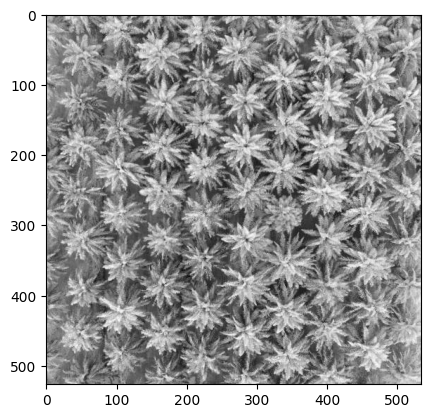

In [30]:
image = cv2.imread('palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(image_gray, (5,5), 0)

plt.imshow(image_gray, cmap="gray")

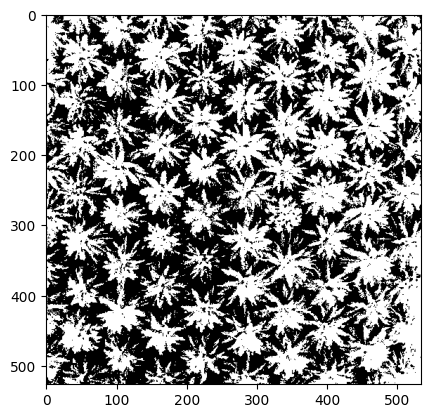

In [31]:
ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

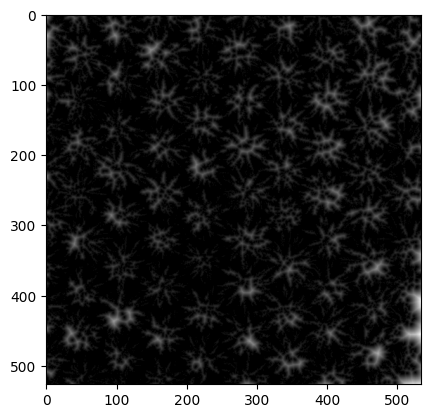

In [32]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

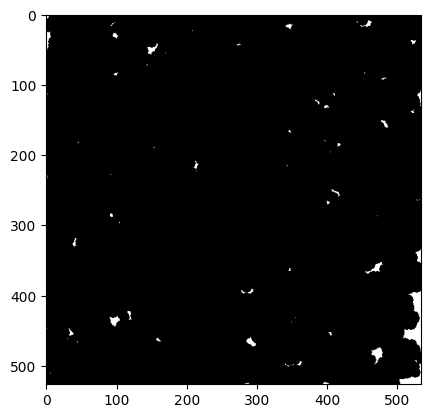

In [33]:
ret, sure_fg = cv2.threshold(dist, 0.37 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

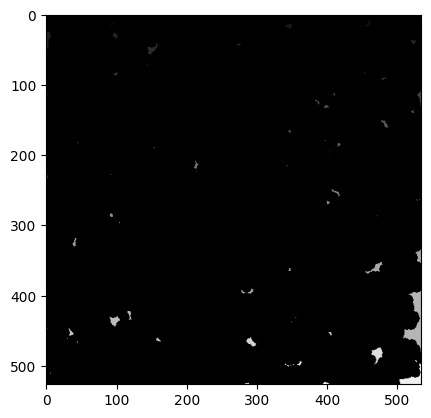

In [34]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg) 
plt.imshow(markers, cmap="gray")

Примерное количество пальм: 73


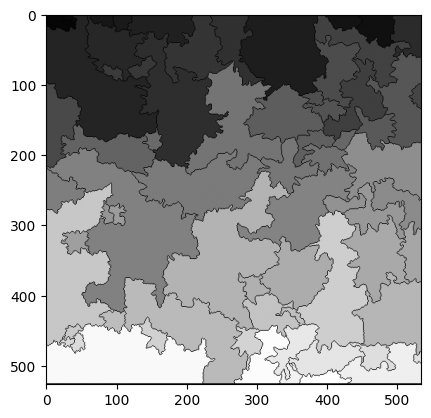

In [36]:
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap="gray")
print('Примерное количество пальм:', len(np.unique(markers)))